In [1]:
import pandas as pd
import numpy as np

In [2]:
estimation = pd.read_csv('../out/estimation.csv')
estimation.drop(['center','agır ve yikik','orta hasar','hafif hasar','oran'],axis=1)
estimation.head()

Unnamed: 0  OBJECTID     adm2_tr     adm2_en   adm1_en  Shape_Leng  \
0           0         1       ŞİŞLİ       SISLI  ISTANBUL    0.187408   
1           1        70      ADALAR      ADALAR  ISTANBUL    0.548223   
2           2       155  ARNAVUTKÖY  ARNAVUTKOY  ISTANBUL    1.167397   
3           3       165    ATAŞEHİR    ATASEHIR  ISTANBUL    0.342889   
4           4       203  BAŞAKŞEHİR  BASAKSEHIR  ISTANBUL    0.615359   

   Shape_Area                                           geometry  \
0    0.001147  POLYGON ((29.00801721300007 41.08488176000003,...   
1    0.001186  MULTIPOLYGON (((29.14379120000007 40.855610399...   
2    0.048664  POLYGON ((28.64241188800003 41.09661984700006,...   
3    0.002713  POLYGON ((29.11147601800008 40.95910563600006,...   
4    0.011455  POLYGON ((28.83302932200007 41.06809693100007,...   

                                    center   distance  ...  agır ve yikik  \
0  ['28.98860870685455 41.05999638574468']  28.592291  ...           2.82   
1  ['29.09759855610525 40.87097358734972']  33.001656  ...           2.82   
2  ['28.68037288585932 41.22732720363182']  38.252291  ...           2.82   
3  ['29.12871411925954 40.98592892509822']  38.445214  ...           2.82   
4  ['28.75909019318206 41.09844067299611']  23.719907  ...           2.82   

   orta hasar  hafif hasar     nufus  hane_halki      oran  hane_sayisi  \
0        4.41         5.31  279817.0        2.90  1.803030      96489.0   
1        4.41         5.31   15238.0        3.20  0.098188       4762.0   
2        4.41         5.31  282488.0        4.11  1.820241      68732.0   
3        4.41         5.31  425094.0        3.49  2.739137     121803.0   
4        4.41         5.31  460259.0        4.44  2.965726     103662.0   

   yikik_agir_hasar  orta_hasarli  hafif_hasarli  
0            2721.0        4255.0         5124.0  
1             134.0         210.0          253.0  
2            1938.0        3031.0         3650.0  
3            3435.0        5372.0         6468.0  
4            2923.0        4571.0         5504.0  

[5 rows x 21 columns]

Türkiye’de Deprem Gerçeği ve TMMOB Makina Mühendisleri Odasının Önerileri Oda Raporuna göre deprem 
vanda toplam; 
52991 adet çadır
3644 adet mevlana evi
55642 adet battaniye
6831 adet ısıtıcı 
23612 adet uyku tulumu
2048594 kg yemek

In [3]:
van_nufusu = pd.read_csv('../data/van_nufus.csv',sep='|')
van_nufusu = van_nufusu.drop([0,2,3,5])
van_nufusu = van_nufusu.drop(['Unnamed: 0','Unnamed: 1','Unnamed: 21'],axis=1)
van_nufusu

Sütunlar Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
1       0-4      10-14      15-19      20-24      25-29      30-34      35-39   
4  137921.0   142042.0   122538.0    94227.0    87942.0    69150.0    60863.0   

  Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  \
1      40-44       45-49       50-54       55-59         5-9       60-64   
4    37161.0     43484.0     27311.0     22927.0    141125.0     17031.0   

  Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18 Unnamed: 19 Unnamed: 20  
1       65-69       70-74       75-79       80-84       85-89         90+  
4     11854.0      8735.0      5853.0      3224.0      1609.0       421.0

In [4]:
van_nufusu = van_nufusu.transpose()

In [5]:
van_nufusu[4] = van_nufusu[4].astype(float)

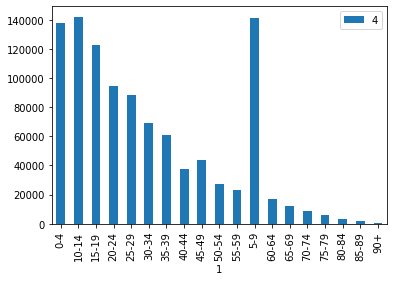

In [6]:
van_nufusu.plot.bar(x=1,y=4)

In [7]:
toplam = van_nufusu[4].sum()
toplam

1035418.0

In [8]:
siddet_nufus = pd.DataFrame()
siddet_nufus['adm'] = estimation['adm2_en']
siddet_nufus['siddet'] = estimation['siddet']
siddet_nufus['nufus'] = estimation['nufus']

In [9]:
siddet_nufus = siddet_nufus.sort_values(by='siddet')
siddet_nufus.head()

adm  siddet     nufus
19           SILE     7.0   37692.0
27          TUZLA     7.0  267400.0
26    SULTANBEYLI     7.0  336021.0
25     SANCAKTEPE     7.0  436733.0
24        SILIVRI     7.0  193680.0
23         PENDIK     7.0  711894.0
22       CEKMEKOY     7.0  264508.0
21         BEYKOZ     7.0  248260.0
20        CATALCA     7.0   73718.0
18     SULTANGAZI     8.0  534565.0
17        USKUDAR     8.0  531825.0
16        SARIYER     8.0  347214.0
15       UMRANIYE     8.0  710280.0
14        MALTEPE     8.0  513316.0
0           SISLI     8.0  279817.0
12        KADIKOY     8.0  482713.0
1          ADALAR     8.0   15238.0
13         KARTAL     8.0  470676.0
3        ATASEHIR     8.0  425094.0
4      BASAKSEHIR     8.0  460259.0
5        BESIKTAS     8.0  182649.0
6         BEYOGLU     8.0  233323.0
2      ARNAVUTKOY     8.0  282488.0
8        ESENYURT     8.0  954579.0
9      EYUPSULTAN     8.0  400513.0
10  GAZIOSMANPASA     8.0  491962.0
11      KAGITHANE     8.0  448025.0
7    BUYUKCEKMECE     8.0  254103.0
37   KUCUKCEKMECE     9.0  792821.0
28        AVCILAR     9.0  448882.0
29       BAGCILAR     9.0  745125.0
30   BAHCELIEVLER     9.0  611059.0
31       BAKIRKOY     9.0  229239.0
32     BAYRAMPASA     9.0  274735.0
33     BEYLIKDUZU     9.0  352412.0
34        ESENLER     9.0  450344.0
35          FATIH     9.0  443090.0
36       GUNGOREN     9.0  289441.0
38    ZEYTINBURNU     9.0  293574.0

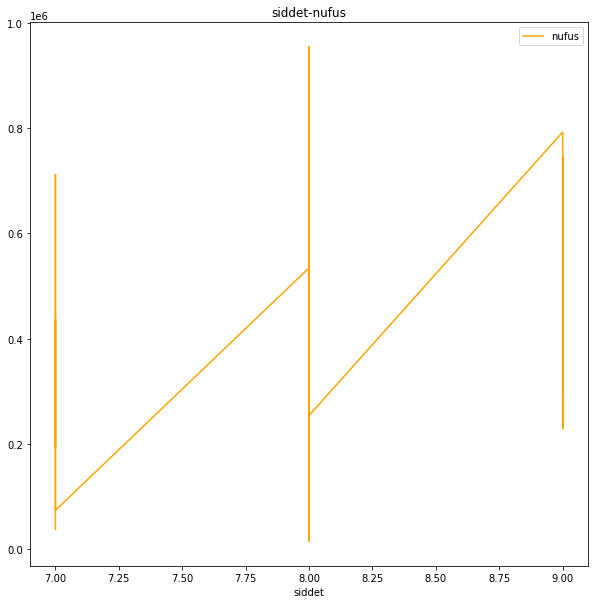

In [10]:
siddet_nufus.plot(x='siddet',y='nufus',title='siddet-nufus',color='Orange',figsize=(10,10))

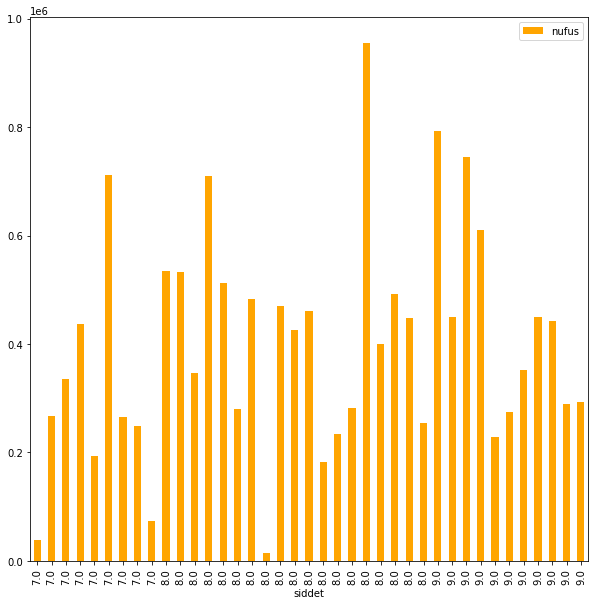

In [11]:
siddet_nufus.plot.bar(x='siddet',y='nufus',figsize=(10,10),color='Orange')

In [12]:
siddet_nufus['nufus_siddet'] = siddet_nufus['siddet']*siddet_nufus['nufus']

In [13]:
siddet_nufus['nufus_siddet'] = (siddet_nufus['nufus_siddet'] - siddet_nufus['nufus_siddet'].min())/(siddet_nufus['nufus_siddet'].max()-siddet_nufus['nufus_siddet'].min())*10

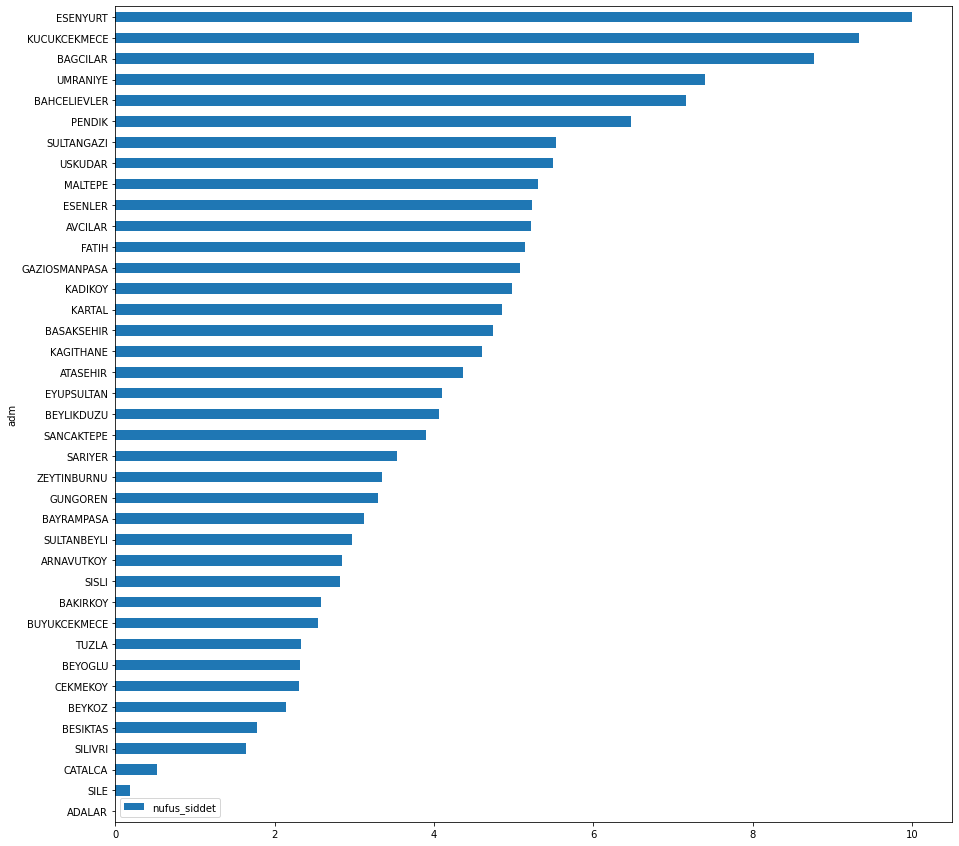

In [18]:
siddet_nufus.sort_values(by='nufus_siddet').plot.barh(x='adm',y='nufus_siddet',figsize=(15,15))

ilk günler için toplam hane nufusu kadar insan evlerinde kalamayacaktır. sonrası için ise göç ve ölümlerle azalan nufusun yanı sıra ağır hasarlı konutlar ve orta hasarlı konutlar için çadır kentlerin kurulmasına ihtiyaç vardır.

In [21]:
toplam_hane = estimation['hane_sayisi'].sum()
toplam_hane

4376694.0

3724624 insanın göç edeceğini ve 31710 insanın öleceğini tahmin etmiştik

In [28]:
depremzede = 15519267 - (3724624 + 31710)
hane_sayisi = depremzede // estimation['hane_halki'].mean()
print('depremde sonrasında gereken kişi bazlı erzak sayısı(battaniye,uyku tulumu,sağlık kitleri vs) : ',deprem_zede)
print('depremde sonrasında hane bazlı erzak sayısı(çadır,ısıtıcı,ocak vs) : ',hane_sayisi)

depremde sonrasında gereken kişi bazlı erzak sayısı(battaniye,uyku tulumu,sağlık kitleri vs) :  11651523
depremde sonrasında hane bazlı erzak sayısı(çadır,ısıtıcı,ocak vs) :  3369725.0
